Making a time series forecasting with the Help of ARIMA Model. 

more about ARIMA Model can be found out at: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/


ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [1]:
!pip install pmdarima
# !pip install nsepy

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
# from nsepy import get_history
import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
df = pd.read_csv('/content/drive/MyDrive/Mini Project Sem 6/HDFC_data.csv')
df = df[['Date', 'Close']]
df.index = df['Date']
df.index = pd.to_datetime(df.index)
# df.drop(['Date'])
df = df[['Close']]
# type(df.index[-1])
# datetime.datetime.now() - df.index[-1]

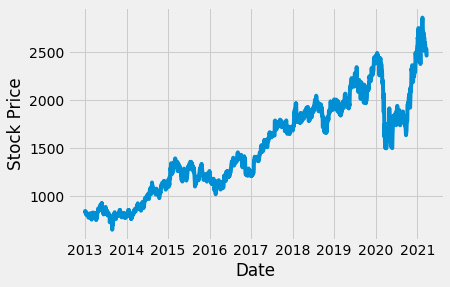

In [104]:
# plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(df)

In [105]:

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


stepwise_fir = auto_arima(df.Close, trace=True, supress_warnings=True)
stepwise_fir.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19628.590, Time=2.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19653.349, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19655.349, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19655.348, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19652.803, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19644.186, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19642.977, Time=1.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19621.976, Time=4.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19637.262, Time=1.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=19607.397, Time=5.31 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=19629.183, Time=3.28 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=19603.710, Time=6.38 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=19619.147, Time=3.51 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=19607.966, Time=7.37 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2038
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -9793.574
Date:                Fri, 23 Apr 2021   AIC                          19603.149
Time:                        19:25:16   BIC                          19648.103
Sample:                             0   HQIC                         19619.640
                               - 2038                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4722      0.033    -44.771      0.000      -1.537      -1.408
ar.L2         -0.8959      0.037    -24.193      0.000      -0.968      -0.823
ar.L3         -0.1765      0.026     -6.917      0.000      -0.227      -0.127
ar.L4         -0.2230      0.021    -10.527      0.000      -0.264      -0.181
ar.L5         -0.0725      0.014     -5.183      0.000      -0.100      -0.045
ma.L1          1.4807      0.030     48.989      0.000       1.421       1.540
ma.L2          0.8482      0.027     31.384      0.000       0.795       0.901
sigma2       878.0904     13.472     65.177      0.000     851.685     904.496
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5971.17
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
# from statsmodels.tsa.arima_model import ARIMA


# print(df.shape)
# train=df.iloc[:-100]
# test = df.iloc[-100:]
# print(train.shape, test.shape)
# model = ARIMA(train.Close, order=(5,1,2))
# model = model.fit()
# print(model.summary())


(2038, 1)
(1938, 1) (100, 1)
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1937
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9199.176
Method:                       css-mle   S.D. of innovations             27.944
Date:                Fri, 23 Apr 2021   AIC                          18416.352
Time:                        19:25:35   BIC                          18466.472
Sample:                             1   HQIC                         18434.785
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5661      0.571      0.991      0.322      -0.554       1.686
ar.L1.D.Close    -0.8766      0.271     -3.239      0.001      -1.407      -0.346
ar.L2.D.Clo

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Close'])

1. ADF :  -0.8307616080478948
2. P-Value :  0.8099186836427368
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 2025
5. Critical Values :
	 1% :  -3.433583387038847
	 5% :  -2.862968345989414
	 10% :  -2.5675303887212313


In [118]:
print(df.shape)
train=df.iloc[:-100]
test = df.iloc[-100:]
print(type(df.Close))
model2 = ARIMA(df, order=(5,1,2))
model2 = model2.fit()
print(df.tail())
model2.summary()



(2038, 1)
<class 'pandas.core.series.Series'>
              Close
Date               
2021-03-19  2531.65
2021-03-22  2531.85
2021-03-23  2509.90
2021-03-24  2465.75
2021-03-25  2470.75


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2037
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9792.567
Method:                       css-mle   S.D. of innovations             29.617
Date:                Fri, 23 Apr 2021   AIC                          19603.135
Time:                        19:30:13   BIC                          19653.708
Sample:                             1   HQIC                         19621.687
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8068      0.567      1.422      0.155      -0.305       1.919
ar.L1.D.Close    -1.4737      0.065    -22.687      0.000      -1.601      -1.346
ar.L2.D.Close    -0.8979      0.061    -14.820      0.000      -1.017      -0.779
ar.L3.D.Close    -0.1798      0.044     -4.093      0.000      -0.266      -0.094
ar.L4.D.Close    -0.2256      0.042     -5.429      0.000      -0.307      -0.144
ar.L5.D.Close    -0.0738      0.028     -2.611      0.009      -0.129      -0.018
ma.L1.D.Close     1.4811      0.061     24.385      0.000       1.362       1.600
ma.L2.D.Close     0.8476      0.046     18.233      0.000       0.756       0.939
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8528           -0.6096j            1.0483           -0.4012
AR.2           -0.8528           +0.6096j            1.0483            0.4012
AR.3            0.8353           -1.8393j            2.0200           -0.1822
AR.4            0.8353           +1.8393j            2.0200            0.1822
AR.5           -3.0216           -0.0000j            3.0216           -0.5000
MA.1           -0.8737           -0.6454j            1.0862           -0.3987
MA.2           -0.8737           +0.6454j            1.0862            0.3987
-----------------------------------------------------------------------------
"""

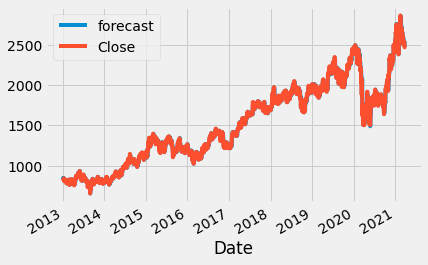

              Close         Pred
Date                            
2021-02-25  2684.70  2716.284130
2021-02-26  2539.40  2686.421005
2021-03-01  2606.00  2530.448412
2021-03-02  2564.00  2616.713809
2021-03-03  2654.90  2580.652702
2021-03-04  2582.95  2649.548458
2021-03-05  2543.90  2578.019255
2021-03-08  2510.25  2550.392951
2021-03-09  2577.30  2505.166277
2021-03-10  2599.80  2601.161720
2021-03-12  2568.00  2588.839195
2021-03-15  2535.50  2564.168118
2021-03-16  2510.40  2538.244537
2021-03-17  2515.55  2509.833080
2021-03-18  2514.60  2529.827689
2021-03-19  2531.65  2510.967814
2021-03-22  2531.85  2535.343009
2021-03-23  2509.90  2532.571505
2021-03-24  2465.75  2505.405442
2021-03-25  2470.75  2471.869541


In [113]:

start = len(train)
end = len(train)+ len(test) -1
pred = model2.predict(start=start, end=end, typ="levels")


model2.plot_predict()
plt.show()

# test['Date'] = pd.to_datetime(test['Date'])

pred.index = test.index
new_df = test.copy()
new_df['Pred'] = pred
new_df = new_df[['Close', 'Pred']]
print(new_df.tail(20))

In [114]:

print(test.Close.mean())
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred, test.Close))
print("The rmse is ", rmse)


2495.3054999999995
The rmse is  52.37741765800268


In [13]:

def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d)
        d += dt.timedelta(days=1)
    return days


In [15]:
from statsmodels.tsa.arima_model import ARIMAResults
loaded = ARIMAResults.load('/content/HDFC_model.pkl')

In [115]:
import datetime as dt
index_future_dates = workdays(dt.datetime(2021, 3, 25), dt.datetime.now() + dt.timedelta(days=20))
pred = model2.predict(start=2038, end=2037+len(index_future_dates), typ='levels').rename('ARIMA PREDICTIONS')
pred.index = index_future_dates
pred = pred[dt.datetime.now():]
print(pred)
pred=pred.iloc[:10]
print(len(pred))
print(pred)


2021-04-26    2495.834477
2021-04-27    2495.461316
2021-04-28    2497.920426
2021-04-29    2497.236457
2021-04-30    2498.853490
2021-05-03    2499.759402
2021-05-04    2499.675041
2021-05-05    2501.774890
2021-05-06    2501.385724
2021-05-07    2502.872127
2021-05-10    2503.712509
2021-05-11    2503.848740
2021-05-12    2505.665834
2021-05-13    2505.514795
Name: ARIMA PREDICTIONS, dtype: float64
10
2021-04-26    2495.834477
2021-04-27    2495.461316
2021-04-28    2497.920426
2021-04-29    2497.236457
2021-04-30    2498.853490
2021-05-03    2499.759402
2021-05-04    2499.675041
2021-05-05    2501.774890
2021-05-06    2501.385724
2021-05-07    2502.872127
Name: ARIMA PREDICTIONS, dtype: float64


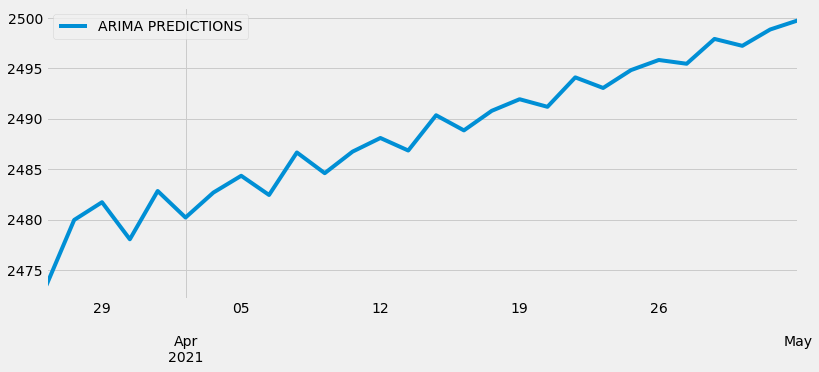

In [116]:


import datetime as dt
# Future dates
# print(dt.datetime.now())
index_future_dates = pd.date_range(start = dt.datetime.now() , end=dt.datetime.now() + dt.timedelta(days=10))
# print(index_future_dates)
index_future_dates = workdays(dt.datetime(2021, 3, 25), dt.datetime.now() + dt.timedelta(days=10))
# print("\n\n\n\n",index_future_dates)
# print(index_future_dates)
pred = model2.predict(start=len(df), end=len(df)+len(index_future_dates)-1, typ='levels').rename('ARIMA PREDICTIONS')
# print("the df is ", df, "\n\n\n\n\n\n")
# print(len(df))
pred.index = index_future_dates
# print(pred)
pred.plot(figsize=(12,5), legend =True)


In [117]:
model2.save('HDFC_model.pkl')

Testing with the values from API

In [39]:
new_df = pd.read_csv('/content/drive/MyDrive/Mini Project Sem 6/file2.csv')
print(new_df.head())
new_df.index = pd.to_datetime(new_df['Date'])
new_df = new_df[['Close']]
print(type(new_df.index[-1]))
print(type(pred.index[-1]))
# print(new_df)
print(type(pred))
pred = pd.DataFrame(pred)
# pred = pred.rename(columns = {0:'Close'})

final_df = pd.concat([pred, new_df], axis=1)
final_df = final_df.dropna(subset=['Close'])
print("The final DF is ")


         Date Symbol Series  ...  Trades  Deliverable Volume  %Deliverble
0  2015-01-01   HDFC     EQ  ...   11804              128793       0.3207
1  2015-01-02   HDFC     EQ  ...   59071             1258847       0.6232
2  2015-01-05   HDFC     EQ  ...   57749             1414720       0.6374
3  2015-01-06   HDFC     EQ  ...   81436             1547523       0.6112
4  2015-01-07   HDFC     EQ  ...  133109             1533304       0.6371

[5 rows x 15 columns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.frame.DataFrame'>
The final DF is 


In [40]:
final_df.dropna(inplace=True)
final_df

,ARIMA PREDICTIONS,Close
2021-03-25,2473.503395,2470.75
2021-03-26,2479.989869,2532.75
2021-03-30,2478.075884,2605.65
2021-03-31,2482.858693,2498.10
2021-04-01,2480.230754,2531.45
2021-04-05,2484.365652,2445.85
2021-04-06,2482.465754,2472.30
2021-04-07,2486.673590,2482.70
2021-04-08,2484.622613,2502.55
2021-04-09,2486.757632,2513.90


In [46]:
final_df['ARIMA PREDICTIONS'] = final_df['ARIMA PREDICTIONS'].apply(lambda x: "%.2f" % x)
final_df['ARIMA PREDICTIONS'] = final_df['ARIMA PREDICTIONS'].astype(float)
final_df['Error'] = final_df['Close']-final_df['ARIMA PREDICTIONS']
final_df['Percentage Error'] = (((-final_df['Close']) + final_df['ARIMA PREDICTIONS']) / final_df['Close']) * 100
final_df

,ARIMA PREDICTIONS,Close,Error,Percentage Error
2021-03-25,2473.50,2470.75,-2.75,0.111302
2021-03-26,2479.99,2532.75,52.76,-2.083111
2021-03-30,2478.08,2605.65,127.57,-4.895899
2021-03-31,2482.86,2498.10,15.24,-0.610064
2021-04-01,2480.23,2531.45,51.22,-2.023346
2021-04-05,2484.37,2445.85,-38.52,1.574913
2021-04-06,2482.47,2472.30,-10.17,0.411358
2021-04-07,2486.67,2482.70,-3.97,0.159907
2021-04-08,2484.62,2502.55,17.93,-0.716469
2021-04-09,2486.76,2513.90,27.14,-1.079597


In [53]:
print('Average percentage error is ', sum(final_df['Percentage Error'].tolist())/len(final_df['Percentage Error'].tolist()))

Average percentage error is  -0.5441801343558865


             Close  ARIMA PREDICTIONS
2013-01-01  832.95                NaN
2013-01-02  846.60                NaN
2013-01-03  845.50                NaN
2013-01-04  837.70                NaN
2013-01-07  822.95                NaN
...            ...                ...
2021-04-15     NaN            2488.86
2021-04-16     NaN            2490.80
2021-04-19     NaN            2491.95
2021-04-20     NaN            2491.20
2021-04-22     NaN            2493.06

[2054 rows x 2 columns]


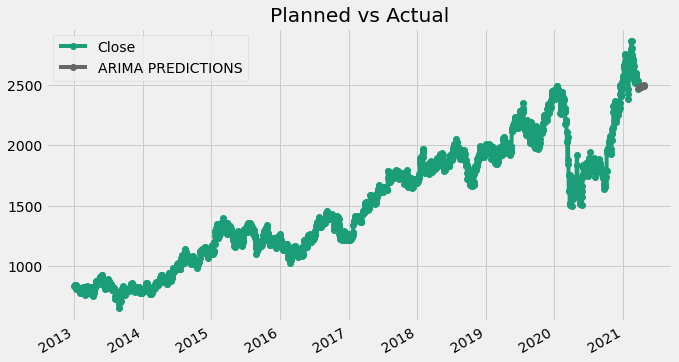

In [54]:
sales_by_city = pd.concat([df['Close'], final_df['ARIMA PREDICTIONS']], axis=1)
print(sales_by_city)
sales_by_city.plot(kind='line',title= 'Planned vs Actual', style='-o', cmap='Dark2',figsize=(10,6), rot=30);

In [42]:
from math import sqrt
sqrt(mean_squared_error(final_df['Close'], final_df['ARIMA PREDICTIONS']))

52.07387055057122

In [30]:
type(final_df.iloc[1]['ARIMA PREDICTIONS'])

numpy.float64